Pokemon holds a very special place in my heart as it is probably the only video game I have judiciously followed for more than 10 years. With this dataset, I wanted to be able to answer the following questions:

Is it possible to build a classifier to identify legendary Pokemon?
How does height and weight of a Pokemon correlate with its various base stats?
What factors influence the Experience Growth and Egg Steps? Are these quantities correlated?
Which type is the strongest overall? Which is the weakest?
Which type is the most likely to be a legendary Pokemon?
Can you build a Pokemon dream team? A team of 6 Pokemon that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokemon.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pokemon = pd.read_csv("/Users/macbook/Downloads/Pokemon.csv")
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
pokemon.shape

(801, 41)

In [41]:
pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'weight_kg', 'generation',
       'is_legendary'],
      dtype='object')

In [5]:
pokemon = pokemon.drop('type2', axis = 1)
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Bulbasaur,88.1,1,65,65,45,grass,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Ivysaur,88.1,2,80,80,60,grass,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Venusaur,88.1,3,122,120,80,grass,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmander,88.1,4,60,50,65,fire,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmeleon,88.1,5,80,65,80,fire,19.0,1,0


In [8]:
pokemon.describe(include = "all")

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary
count,801,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801,703.000000,801.000000,801.000000,801.000000,801.000000,801,781.000000,801.000000,801.000000
unique,482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,801,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN
top,['Levitate'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Haunter,NaN,NaN,NaN,NaN,NaN,water,NaN,NaN,NaN
freq,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN,NaN
mean,NaN,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,...,NaN,55.155761,401.000000,71.305868,70.911361,66.334582,NaN,61.378105,3.690387,0.087391
std,NaN,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,...,NaN,20.261623,231.373075,32.353826,27.942501,28.907662,NaN,109.354766,1.930420,0.282583
min,NaN,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,...,NaN,0.000000,1.000000,10.000000,20.000000,5.000000,NaN,0.100000,1.000000,0.000000
25%,NaN,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,...,NaN,50.000000,201.000000,45.000000,50.000000,45.000000,NaN,9.000000,2.000000,0.000000
50%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,50.000000,401.000000,65.000000,66.000000,65.000000,NaN,27.300000,4.000000,0.000000
75%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,NaN,50.000000,601.000000,91.000000,90.000000,85.000000,NaN,64.800000,5.000000,0.000000


/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


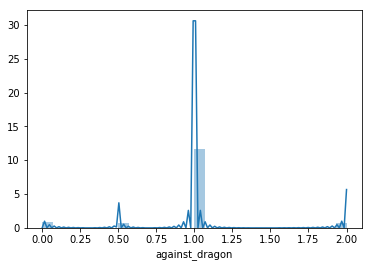

In [6]:
#Dist Plot
against_dragon = pokemon.iloc[:, 3]
sns.distplot(against_dragon)

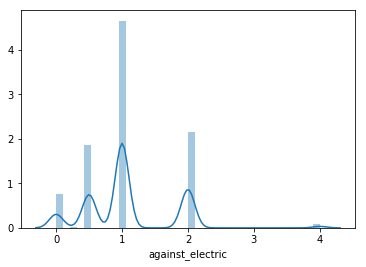

In [7]:
against_electric = pokemon.iloc[:, 4]
sns.distplot(against_electric)

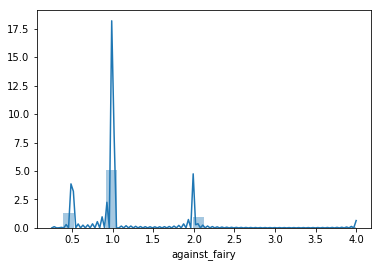

In [10]:
against_fairy = pokemon.iloc[:, 5]
sns.distplot(against_fairy)

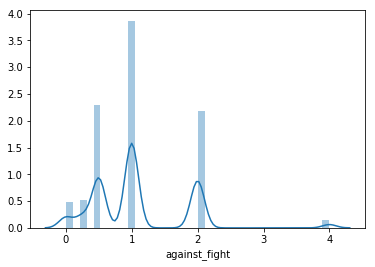

In [13]:
against_fight = pokemon.iloc[:, 6]
sns.distplot(against_fight)

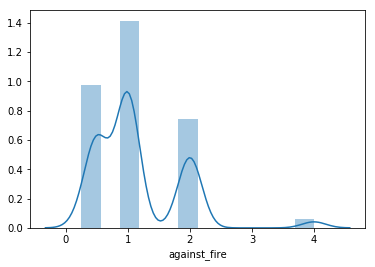

In [16]:
against_fire = pokemon.iloc[:, 7]
sns.distplot(against_fire)

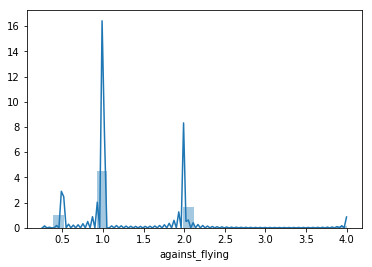

In [83]:
against_flying = pokemon.iloc[:, 8]
sns.distplot(against_flying)

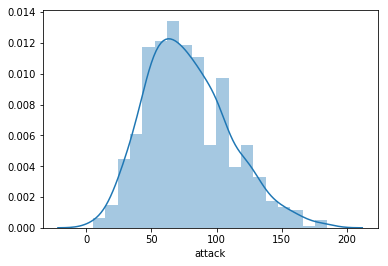

In [84]:
 attack = pokemon.iloc[:, 19]
sns.distplot(attack)

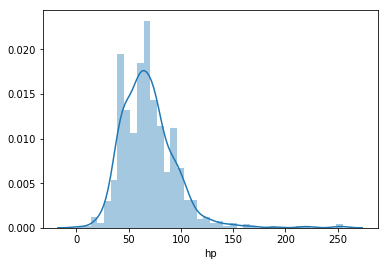

In [86]:
hp = pokemon.iloc[:, 28]
sns.distplot(hp)

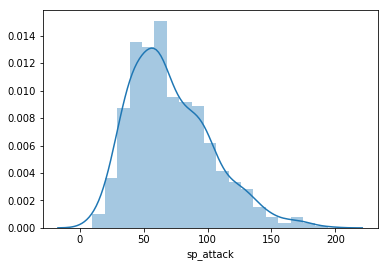

In [87]:
sp_attack = pokemon.iloc[:, 33]
sns.distplot(sp_attack)

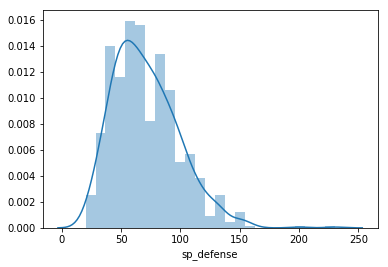

In [88]:
sp_defense = pokemon.iloc[:, 34]
sns.distplot(sp_defense)

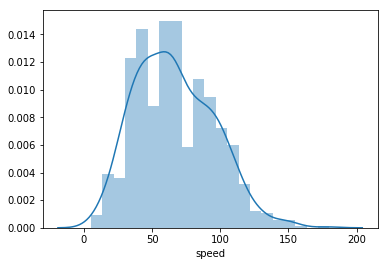

In [89]:
speed = pokemon.iloc[:, 35]
sns.distplot(speed)

In [126]:
stat = []
for i in list(pokemon.columns.values)[3: 9]:
    stat.append(i)
stat

['against_dragon',
 'against_electric',
 'against_fairy',
 'against_fight',
 'against_fire',
 'against_flying']

<Figure size 720x360 with 0 Axes>

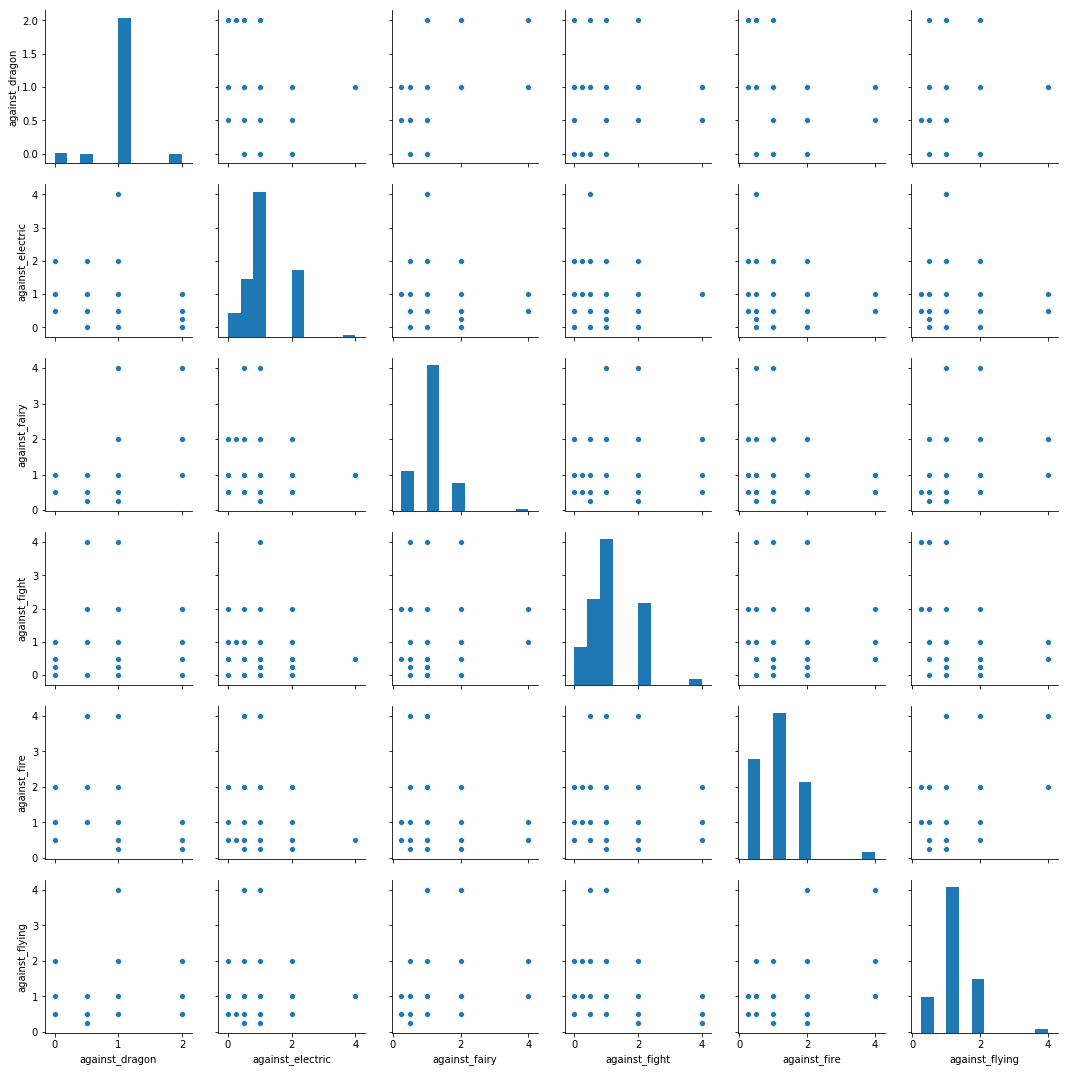

In [137]:
plt.figure(figsize = (10, 5))
sns.pairplot(pokemon[stat])

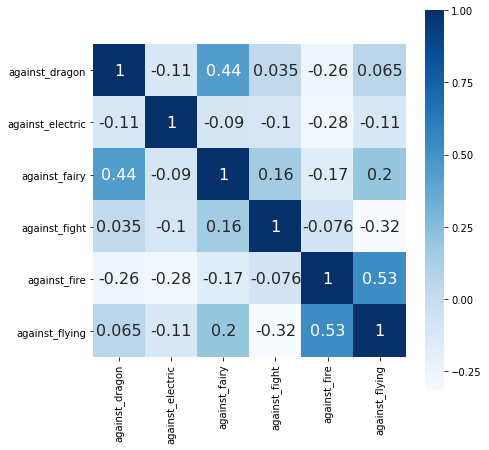

In [22]:
cor_matrix = pokemon[stat].corr()
plt.subplots(figsize = (7, 7))
sns.heatmap(cor_matrix, annot = True, square = True, annot_kws = {"size": 16}, cmap = 'Blues')

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pm_scale = StandardScaler().fit(pokemon[stat])
df_scale = pm_scale.transform(pokemon[stat])

In [24]:
print(df_scale[:, 0].mean())
print(df_scale[:, 0].std())

-1.4414880719228e-16
0.9999999999999998


In [25]:
pm_pca = PCA(n_components = 0.8).fit(df_scale)

In [26]:
scores = pd.DataFrame(pm_pca.transform(df_scale))
loadings = pd.DataFrame(pm_pca.components_, columns = stat)

[Text(0, 0.5, 'against_dragon'),
 Text(0, 1.5, 'against_electric'),
 Text(0, 2.5, 'against_fairy'),
 Text(0, 3.5, 'against_fight'),
 Text(0, 4.5, 'against_fire'),
 Text(0, 5.5, 'against_flying')]

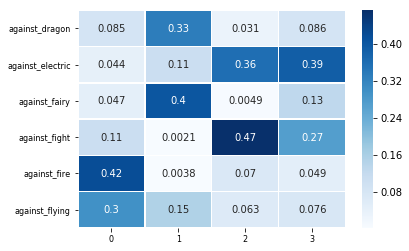

In [27]:
loading2 = loadings ** 2
pm_pca_heatmap = sns.heatmap(loading2.transpose(), linewidths = 0.5, cmap = "Blues", annot = True)
pm_pca_heatmap.set_xticklabels(pm_pca_heatmap.xaxis.get_majorticklabels(), rotation = 0, fontsize = 8)
pm_pca_heatmap.set_yticklabels(pm_pca_heatmap.yaxis.get_majorticklabels(), rotation = 0, fontsize = 8)

[Text(0, 0.5, 'against_dragon'),
 Text(0, 1.5, 'against_electric'),
 Text(0, 2.5, 'against_fairy'),
 Text(0, 3.5, 'against_fight'),
 Text(0, 4.5, 'against_fire'),
 Text(0, 5.5, 'against_flying')]

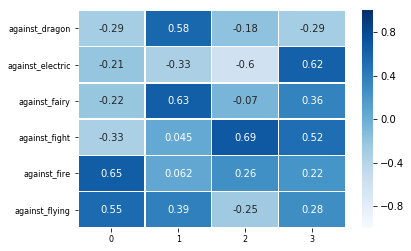

In [28]:
pm_pca_heatmap2 = sns.heatmap(loadings.transpose(), center = 0, linewidths = 0.5, cmap = "Blues", vmin = -1, vmax = 1, annot = True)
pm_pca_heatmap2.set_xticklabels(pm_pca_heatmap2.xaxis.get_majorticklabels(), rotation = 0, fontsize = 8)
pm_pca_heatmap2.set_yticklabels(pm_pca_heatmap2.yaxis.get_majorticklabels(), rotation = 0, fontsize = 8)

In [29]:
#KMeans Clustering
pm_pca_k = PCA(n_components = 0.8).fit_transform(df_scale)

In [30]:
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters = 4).fit(pm_pca_k)

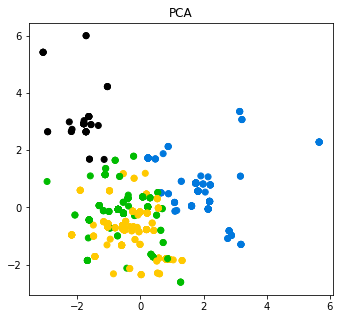

In [31]:
plt.figure(figsize=(12, 5))
cmap = plt.get_cmap('nipy_spectral')
plt.subplot(1,2,2)
plt.scatter(pm_pca_k[:, 0], pm_pca_k[:, 1], c = cmap(kmeans_pca.labels_ / 4))
plt.title('PCA');

In [32]:
stat_cluster = pd.DataFrame(kmeans_pca.cluster_centers_.T, index = ['PC 1', 'PC 2', 'PC 3', 'PC 4'], columns = ['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4'])
stat_cluster

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
PC 1,-1.866198,1.842819,-0.516058,-0.401799
PC 2,3.244175,0.722423,-0.151392,-0.726207
PC 3,-0.311075,-0.110740,1.197797,-0.696788
PC 4,-0.646629,0.223651,-0.039023,-0.007992


In [43]:
from sklearn.metrics import completeness_score, homogeneity_score
c_score = completeness_score(pokemon['pokedex_number'], kmeans_pca.labels_)
print(c_score)
h_score = homogeneity_score(pokemon['pokedex_number'], kmeans_pca.labels_)
print(h_score)

1.0000000000000002
0.1830115129280422


In [37]:
#Classification
pokemon_stat = pokemon[stat]
pokemon_stat.head()

,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying
0,1.0,0.5,0.5,0.5,2.0,2.0
1,1.0,0.5,0.5,0.5,2.0,2.0
2,1.0,0.5,0.5,0.5,2.0,2.0
3,1.0,1.0,0.5,1.0,0.5,1.0
4,1.0,1.0,0.5,1.0,0.5,1.0


In [49]:
pokemon_target = pokemon.is_legendary
pokemon_target.head()

0    0
1    0
2    0
3    0
4    0
Name: is_legendary, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
pokemon_train, pokemon_test, pokemon_target_train, pokemon_target_test = train_test_split(pokemon_stat, pokemon_target, test_size = 0.2, random_state = 33)

In [51]:
pokemon_train.shape

(640, 6)

In [52]:
pokemon_test.shape

(161, 6)

In [53]:
pokemon_target_train.shape

(640,)

In [54]:
pokemon_target_test.shape

(161,)

In [55]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(pokemon_train)

In [56]:
pokemon_train_norm = min_max_scaler.transform(pokemon_train)

In [57]:
pokemon_test_norm = min_max_scaler.transform(pokemon_test)

In [62]:
#KNN
nn = 5
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier(nn, weights = 'distance')
knnclf.fit(pokemon_train_norm, pokemon_target_train)
knnpreds_test = knnclf.predict(pokemon_test_norm)
print(knnpreds_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [64]:
from sklearn.metrics import classification_report
print(classification_report(pokemon_target_test, knnpreds_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       146
           1       0.00      0.00      0.00        15

    accuracy                           0.89       161
   macro avg       0.45      0.49      0.47       161
weighted avg       0.82      0.89      0.86       161



In [67]:
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(pokemon_target_test, knnpreds_test)
print(knncm)

[[144   2]
 [ 15   0]]


In [68]:
print(knnclf.score(pokemon_test_norm, pokemon_target_test))

0.8944099378881988


In [70]:
print(knnclf.score(pokemon_train_norm, pokemon_target_train))

0.934375


In [74]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 3)
treeclf = treeclf.fit(pokemon_train, pokemon_target_train)
treepreds_test = treeclf.predict(pokemon_test)
print(treepreds_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [76]:
print(treeclf.score(pokemon_test, pokemon_target_test))

0.8944099378881988


In [77]:
print(treeclf.score(pokemon_train, pokemon_target_train))

0.93125


In [75]:
print(classification_report(pokemon_target_test, treepreds_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       146
           1       0.00      0.00      0.00        15

    accuracy                           0.89       161
   macro avg       0.45      0.49      0.47       161
weighted avg       0.82      0.89      0.86       161



In [80]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB()
nbclf = nbclf.fit(pokemon_train, pokemon_target_train)
nbpreds_test = nbclf.predict(pokemon_test)
print(nbpreds_test)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [81]:
print(nbclf.score(pokemon_train, pokemon_target_train))
print(nbclf.score(pokemon_test, pokemon_target_test))

0.8828125
0.8695652173913043
